In [1]:
# Importing all necessary tools
# Importing necessary libraries for LazyClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from skopt import gp_minimize
from sklearn.svm import NuSVC
import optuna

In [2]:
# Importing table and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing dataset splitting and imputing libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import LeaveOneOut

In [4]:
# Reading .csv file for complete, cleaned dataset
df_path='https://raw.githubusercontent.com/abd-adhyatma/llzo-improvement/main/llzo_dataset_clean.csv'

In [5]:
df_raw=pd.read_csv(df_path)
df = df_raw[0:176]
df.head(176)


,source,li_sto,la_sto,zr_sto,li_dop_sto,la_dop_sto,zr_dop_sto,rel_dens_%,conductivity,log_cond,good_cond,li_dopant,la_dopant,zr_dopant,li_dop_ionicrad,la_dop_ionicrad,zr_dop_ionicrad,li_dop_enev,la_dop_enev,zr_dop_enev
0,10.1016/j.ssi.2017.11.027,5.00,3.00,0.00,0.00,0.00,2.00,NaN,0.00,-6.14,0.00,NaN,NaN,ta,0.00,0.00,78.00,0.00,0.00,1.50
1,10.1016/j.jpowsour.2012.01.094,5.50,3.00,0.50,0.00,0.00,1.50,NaN,0.00,-4.03,0.00,NaN,NaN,ta,0.00,0.00,78.00,0.00,0.00,1.50
2,10.1016/j.ssi.2017.09.005,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,-3.82,0.00,NaN,ba,ta,0.00,156.00,78.00,0.00,0.89,1.50
3,10.1039/c2ra01042a,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,-4.05,0.00,NaN,ba,ta,0.00,156.00,78.00,0.00,0.89,1.50
4,10.1016/j.ssi.2017.11.027,6.05,2.95,1.00,0.00,0.05,1.00,NaN,0.00,-3.89,0.00,NaN,ca,ta,0.00,126.00,78.00,0.00,1.00,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,10.1016/j.ceramint.2018.01.065,7.00,3.00,2.00,0.00,0.00,0.00,87.70,0.00,-3.73,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00
172,10.1111/jace.14736,7.00,3.00,2.00,0.00,0.00,0.00,88.70,0.00,-4.59,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00
173,10.1016/j.matlet.2018.08.006,7.00,3.00,2.00,0.00,0.00,0.00,84.60,0.00,-4.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00
174,10.1016/j.jpowsour.2013.10.089,6.85,3.09,2.07,0.00,0.00,0.00,NaN,0.00,-3.77,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
# Dropping unnecessary columns for prediction
df = df.drop(['conductivity','log_cond','li_dopant','la_dopant','zr_dopant','source'], axis=1)
df.head()

,li_sto,la_sto,zr_sto,li_dop_sto,la_dop_sto,zr_dop_sto,rel_dens_%,good_cond,li_dop_ionicrad,la_dop_ionicrad,zr_dop_ionicrad,li_dop_enev,la_dop_enev,zr_dop_enev
0,5.00,3.00,0.00,0.00,0.00,2.00,NaN,0.00,0.00,0.00,78.00,0.00,0.00,1.50
1,5.50,3.00,0.50,0.00,0.00,1.50,NaN,0.00,0.00,0.00,78.00,0.00,0.00,1.50
2,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,0.00,156.00,78.00,0.00,0.89,1.50
3,6.50,2.50,1.00,0.00,0.50,1.00,NaN,0.00,0.00,156.00,78.00,0.00,0.89,1.50
4,6.05,2.95,1.00,0.00,0.05,1.00,NaN,0.00,0.00,126.00,78.00,0.00,1.00,1.50


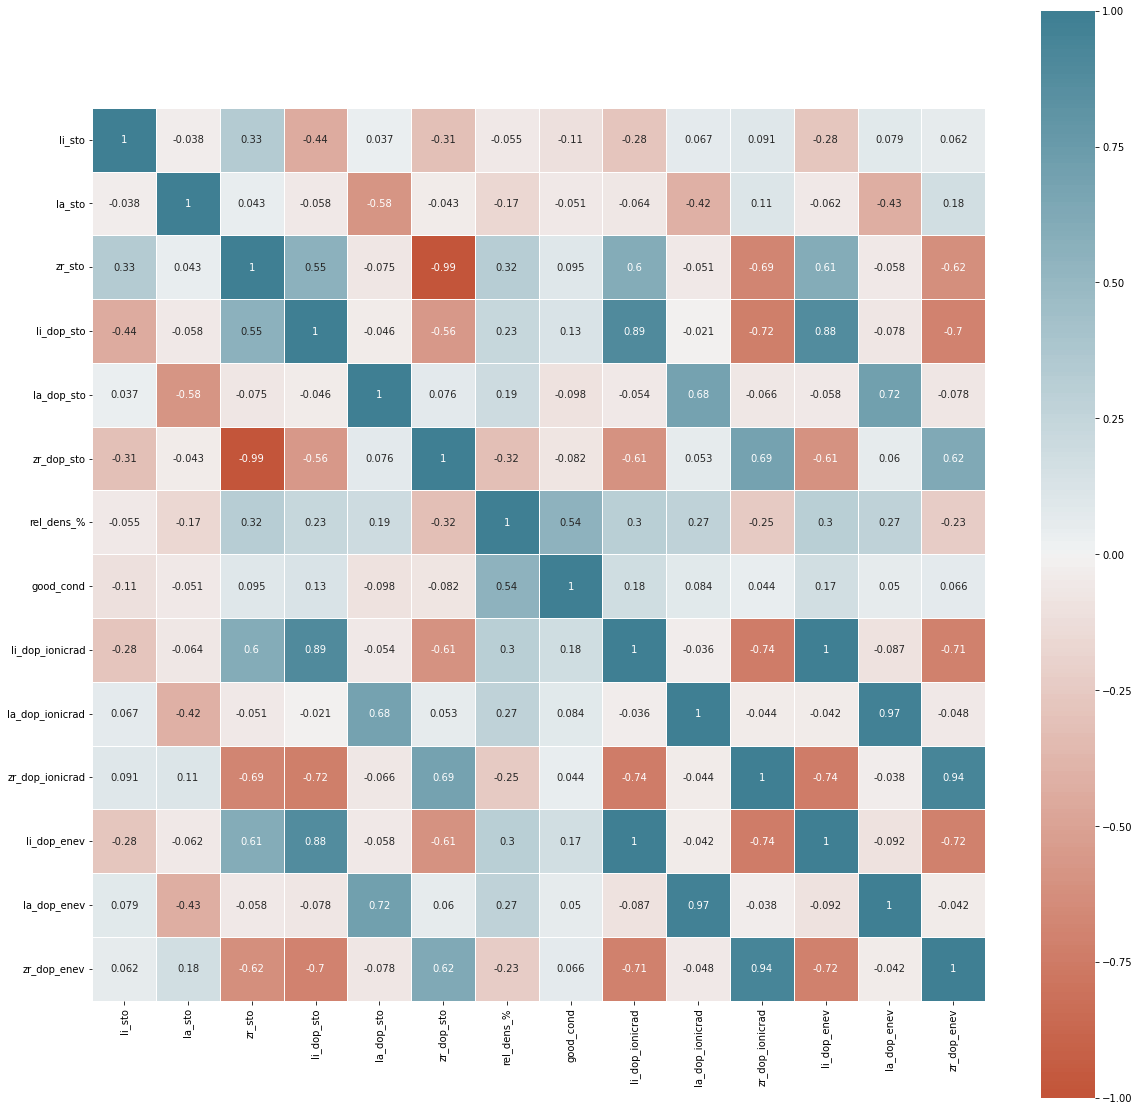

In [7]:
# Finding correlation between features
corr = df.corr()
plt.subplots(figsize=(20,20))
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    linewidths = .5, annot = True,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True)

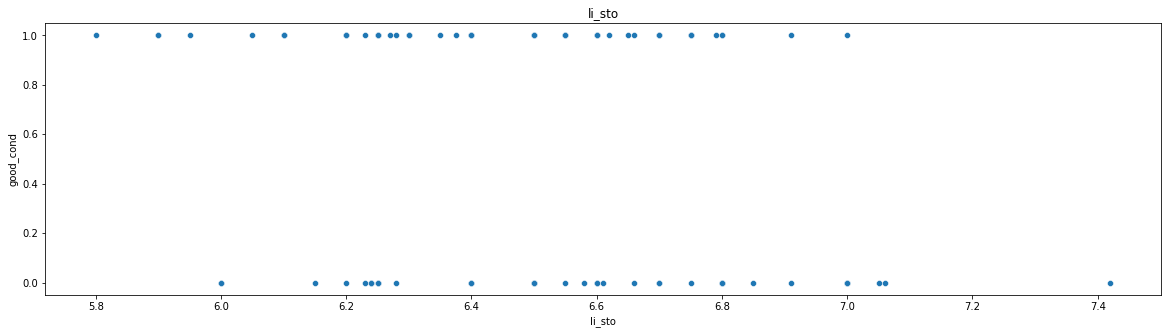

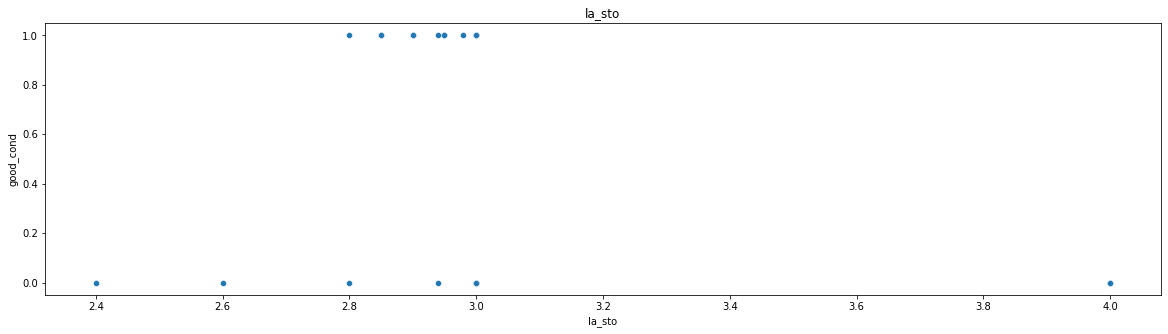

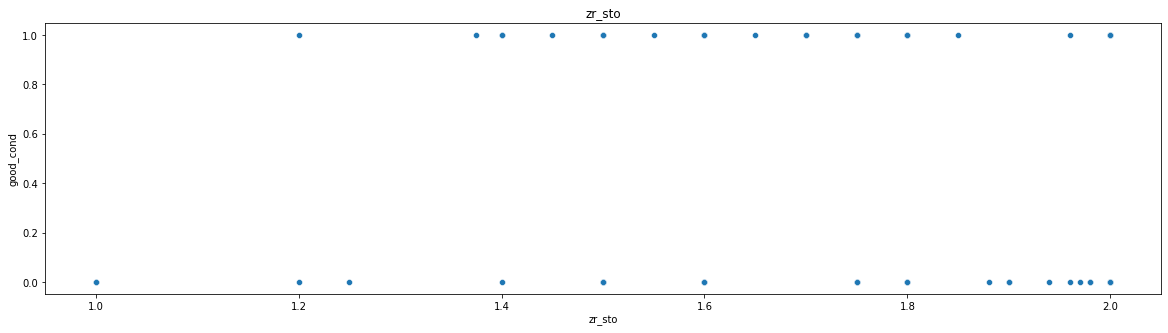

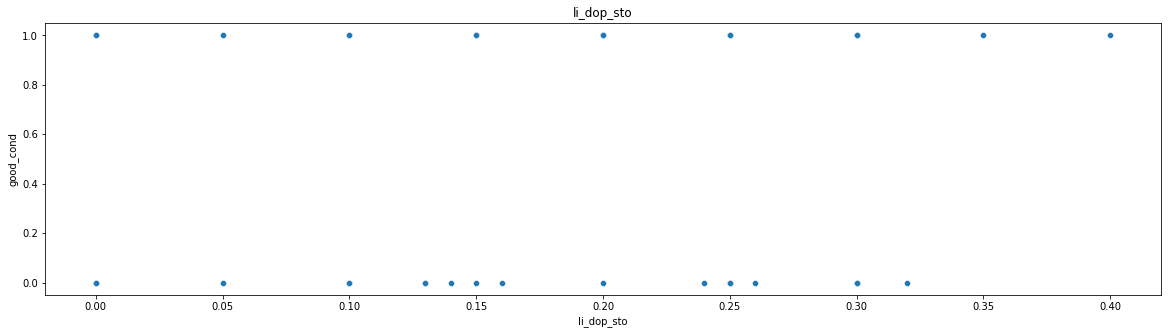

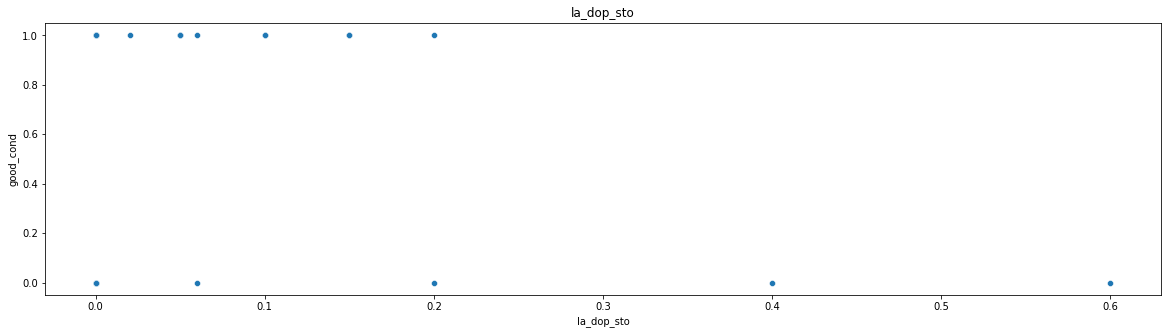

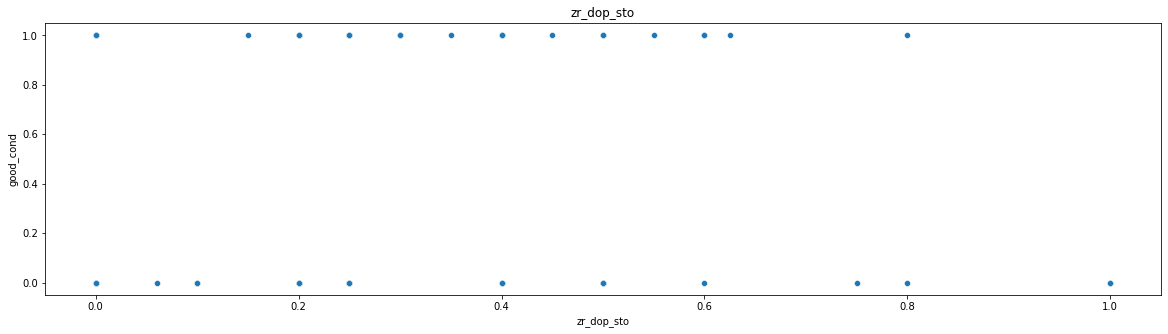

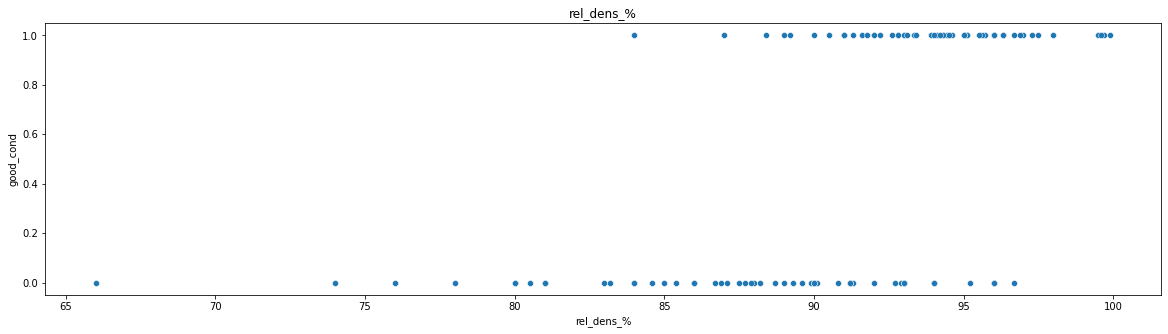

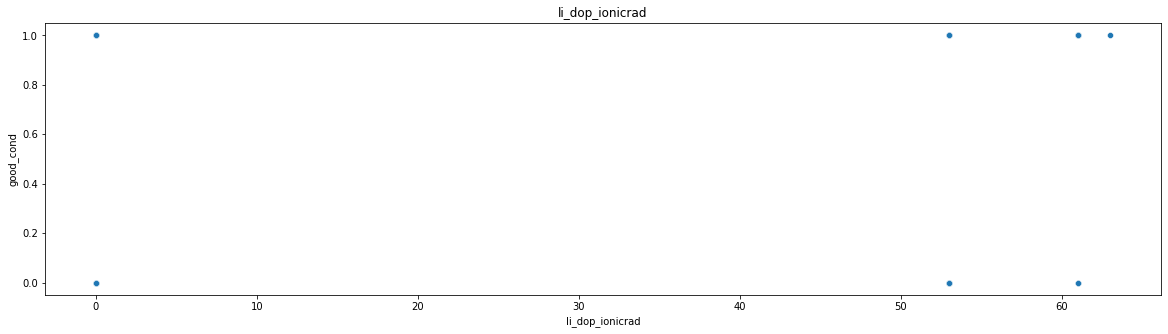

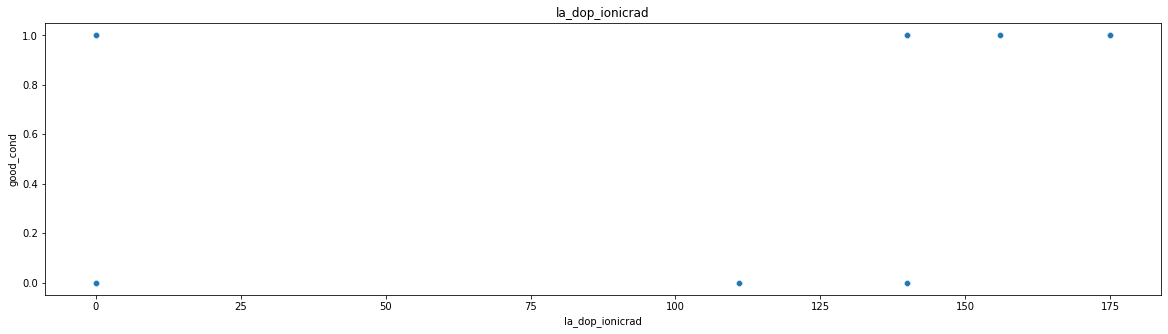

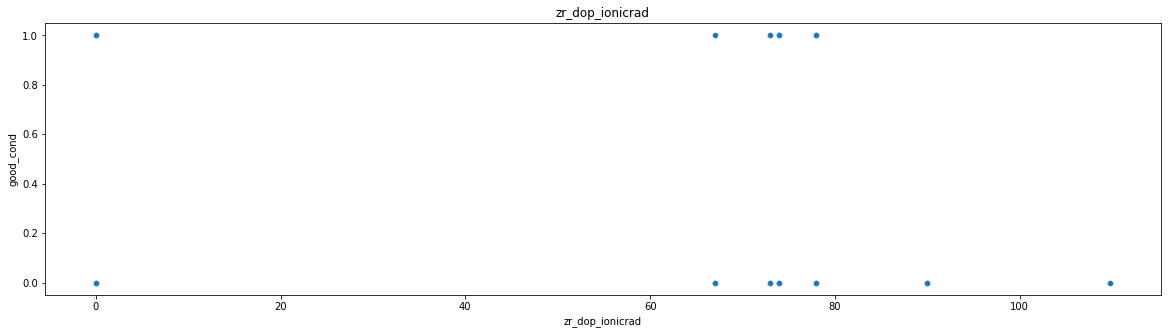

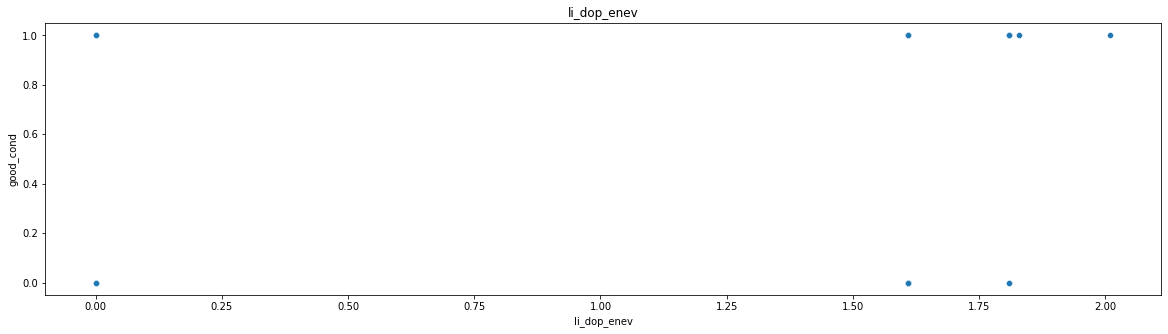

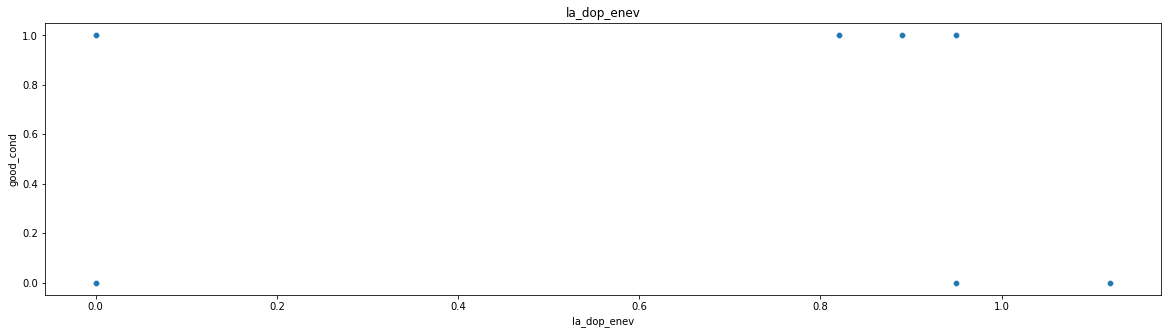

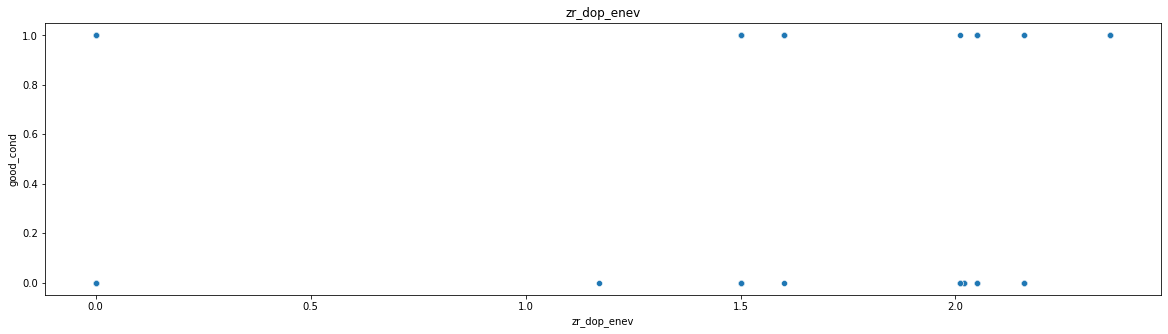

In [8]:
# Making scatterplots to illustrate feature data distribution in respect to conductivity
for col in df.columns.values:
    if col == 'good_cond':
        continue
    plt.figure(figsize=(20,5))
    sns.scatterplot(df.dropna()[col], df.dropna()['good_cond'])
    plt.title(col)
    plt.show()

In [9]:
# Defining X (features) and y (target property) for cut dataset
X = df.dropna().drop('good_cond', axis=1)
y = df.dropna()['good_cond']
print(X)

X_full = df.drop('good_cond', axis=1)
y_full = df['good_cond']


     li_sto  la_sto  zr_sto  li_dop_sto  la_dop_sto  zr_dop_sto  rel_dens_%  \
5      6.00    3.00    1.00        0.00        0.00        1.00       84.00   
6      6.00    3.00    1.00        0.00        0.00        1.00       86.00   
9      6.20    3.00    1.20        0.00        0.00        0.80       84.00   
10     6.20    3.00    1.20        0.00        0.00        0.80       76.00   
11     6.25    3.00    1.25        0.00        0.00        0.75       83.00   
..      ...     ...     ...         ...         ...         ...         ...   
167    6.85    3.00    2.00        0.05        0.00        0.00       94.00   
169    7.00    3.00    2.00        0.00        0.00        0.00       96.70   
171    7.00    3.00    2.00        0.00        0.00        0.00       87.70   
172    7.00    3.00    2.00        0.00        0.00        0.00       88.70   
173    7.00    3.00    2.00        0.00        0.00        0.00       84.60   

     li_dop_ionicrad  la_dop_ionicrad  zr_dop_ionic

In [22]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Using LazyClassifier for cut dataset
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
modellist = list(models.index.values) # Get the list of the methods' names
models

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 49.62it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.96,0.96,0.96,0.96,0.08
NuSVC,0.96,0.96,0.96,0.96,0.01
SVC,0.87,0.88,0.88,0.87,0.01
BaggingClassifier,0.87,0.87,0.87,0.87,0.02
RandomForestClassifier,0.87,0.87,0.87,0.87,0.10
KNeighborsClassifier,0.87,0.87,0.87,0.87,0.01
LabelSpreading,0.87,0.87,0.87,0.87,0.01
LinearSVC,0.83,0.85,0.85,0.82,0.01
CalibratedClassifierCV,0.83,0.85,0.85,0.82,0.02


In [23]:
Nrep = 1000 # Number of replications, the higher the better
r2score = np.zeros((len(modellist),Nrep)) # Initialize the r2score
position = np.zeros((len(modellist),Nrep)) # Initialize the position (rank)
for LOOP in range(0,Nrep):

    #Splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = LOOP)

    #Using LazyRegressor for cut dataset
    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    modelstemp, predictionstemp = clf.fit(X_train, X_test, y_train, y_test)
 
    modellisttemp = list(modelstemp.index.values)
    
    for i, mdl in zip(range(0,len(modellist)),modellist):
        search_pos = int(modellisttemp.index(models.index.values[i]))
        r2score[i,LOOP] = modelstemp.iloc[:,0][search_pos]
        position[i,LOOP] = search_pos
    

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 45.86it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 46.30it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 45.94it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 46.38it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 46.15it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 45.94it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 45.78it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 46.08it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 46.52it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 46.61it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 44.19it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 45.00it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 46.15it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 46.05it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 46.37it/s]


In [24]:
print('------------------ CUT DATASET ------------------')
idx = np.argmax(np.mean(r2score, axis=1))
print('The best model according to the mean acc. score is ',modellist[idx],'with score',max(np.mean(r2score,axis=1)))
idx = np.argmax(np.median(r2score,axis=1))
print('The best model according to the median acc. score is ',modellist[idx],'with score',max(np.median(r2score,axis=1)))
idx = np.argmin(np.mean(position,axis=1))
print('The best model according to the mean ranking is ',modellist[idx],'with score',min(np.mean(position,axis=1)))
idx = np.argmin(np.median(position,axis=1))
print('The best model according to the median ranking is ',modellist[idx],'with score',min(np.median(position,axis=1)))

------------------ CUT DATASET ------------------
The best model according to the mean acc. score is  RandomForestClassifier with score 0.8175862068965517
The best model according to the median acc. score is  NuSVC with score 0.8275862068965517
The best model according to the mean ranking is  RandomForestClassifier with score 6.763
The best model according to the median ranking is  RandomForestClassifier with score 5.0


In [25]:
modellist_df = pd.DataFrame(modellist).rename(columns = {0:'Model'})
mean_df = pd.DataFrame(np.mean(r2score, axis = 1)).rename(columns = {0:'Accuracy mean'})
med_df = pd.DataFrame(np.median(r2score, axis = 1)).rename(columns = {0:'Accuracy median'})
rankmean_df = pd.DataFrame(np.mean(position, axis = 1)).rename(columns = {0:'Rank mean'})
rankmed_df = pd.DataFrame(np.median(position, axis = 1)).rename(columns = {0:'Rank median'})
models_df = pd.concat([modellist_df, mean_df, rankmean_df, med_df, rankmed_df], axis = 1)
models_df.sort_values(['Accuracy mean', 'Accuracy median'], ascending = False).head(5)

,Model,Accuracy mean,Rank mean,Accuracy median,Rank median
4,RandomForestClassifier,0.82,6.76,0.83,5.00
13,LGBMClassifier,0.81,7.21,0.83,6.00
1,NuSVC,0.81,7.34,0.83,6.00
3,BaggingClassifier,0.81,7.78,0.83,7.00
19,XGBClassifier,0.80,8.96,0.79,8.00


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
Nrep = 200 # Number of replications, the higher the better
r2score_full = np.zeros((len(modellist),Nrep)) # Initialize the r2score
position_full = np.zeros((len(modellist),Nrep)) # Initialize the position (rank)
for LOOP in range(0,Nrep):

    #Splitting
    X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.25, random_state = LOOP)

    #Imputing X_train and X_test
    X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train_full))
    X_train_imputed.columns = X_train_full.columns
    X_train_imputed.index = X_train_full.index

    X_test_imputed = pd.DataFrame(imputer.fit_transform(X_test_full))
    X_test_imputed.columns = X_test_full.columns
    X_test_imputed.index = X_test_full.index
    
    #Using LazyClassifier for cut dataset
    clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
    modelstemp,predictionstemp = clf.fit(X_train_imputed, X_test_imputed, y_train_full, y_test_full)
 
    modellisttemp = list(modelstemp.index.values)
    
    for i, mdl in zip(range(0,len(modellist)),modellist):
        search_pos = int(modellisttemp.index(models.index.values[i]))
        r2score_full[i,LOOP] = modelstemp.iloc[:,0][search_pos]
        position_full[i,LOOP] = search_pos

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 46.03it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 44.98it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 43.52it/s]


In [27]:
print('------------------ IMPUTED DATASET ------------------')
idx_full = np.argmax(np.mean(r2score_full,axis=1))
print('The best model according to the mean acc. score is ',modellist[idx_full],'with score',max(np.mean(r2score_full,axis=1)))
idx_full = np.argmax(np.median(r2score_full,axis=1))
print('The best model according to the median acc. score is ',modellist[idx_full],'with score',max(np.median(r2score_full,axis=1)))
idx_full = np.argmin(np.mean(position_full,axis=1))
print('The best model according to the mean ranking is ',modellist[idx_full],'with score',min(np.mean(position_full,axis=1)))
idx_full = np.argmin(np.median(position_full,axis=1))
print('The best model according to the median ranking is ',modellist[idx_full],'with score',min(np.median(position_full,axis=1)))

------------------ IMPUTED DATASET ------------------
The best model according to the mean acc. score is  NuSVC with score 0.7655681818181819
The best model according to the median acc. score is  NuSVC with score 0.7727272727272727
The best model according to the mean ranking is  NuSVC with score 6.405
The best model according to the median ranking is  NuSVC with score 5.0


In [28]:
# Leave one out cross-validation (un-optimized)
cvpred = np.zeros([len(X)]) #Creating array of zeros as big as the length of X
Xnp = X.to_numpy() #Converts feature set to np array
ynp = y.to_numpy() #Converts target property to numpy
for i in range(0,len(X)):
    xpred = Xnp[i,:].reshape(1,-1) #Define X_val
    XLOO = np.delete(Xnp,i,axis=0) #Define X_train
    yLOO = np.delete(ynp,i).reshape(-1,1) #Define y_train
    modelLOO = LGBMClassifier() #Define model
    modelLOO.fit(XLOO, yLOO) #Fitting model to training set
    cvpred[i] = modelLOO.predict(xpred) #Adding predict score to array of zeros
LOOCVscore = np.sum(cvpred == ynp)/len(X)

print('LOOCV error of LGBMClassifier is ', LOOCVscore)

LOOCV error of LGBMClassifier is  0.7964601769911505


In [29]:
# Defining LOOCV function, takes input of X, y, and model and returns the mean score
def LOO_cross_val (X, y, model):
    cvpred = np.zeros([len(X)]) #Creating array of zeros as big as the length of X
    Xnp = X.to_numpy() #Converts feature set to np array
    ynp = y.to_numpy() #Converts target property to numpy
    for i in range(0,len(X)):
        xpred = Xnp[i,:].reshape(1,-1) #Define X_val
        XLOO = np.delete(Xnp,i,axis=0) #Define X_train
        yLOO = np.delete(ynp,i).reshape(-1,1) #Define y_train
        modelLOO = model #Define model
        modelLOO.fit(XLOO, yLOO) #Fitting model to training set
        cvpred[i] = modelLOO.predict(xpred) #Adding predict score to array of zeros
    LOOCVscore = np.sum(cvpred == ynp)/len(X)
    return LOOCVscore

In [30]:
from sklearn.ensemble import BaggingClassifier
candidates = {'NuSVC' : NuSVC(), 'LGBM' : LGBMClassifier(), 'RF': RandomForestClassifier()}
candidates
for candidate, model in candidates.items():
    print('The candidate {} scored {} in a baseline LOOCV'.format(candidate, LOO_cross_val(X, y, model)))


The candidate NuSVC scored 0.8495575221238938 in a baseline LOOCV
The candidate LGBM scored 0.7964601769911505 in a baseline LOOCV
The candidate RF scored 0.8053097345132744 in a baseline LOOCV


In [31]:
from sklearn.model_selection import StratifiedKFold
# Split train data to 5 outer folds and 4 inner folds
skfold_outer = StratifiedKFold(n_splits=5, shuffle = True, random_state = None)

In [32]:
# Executing nested cross-validation for DecisionTree
i = 1
folds = []
for train_index_outer, test_index_outer in skfold_outer.split(X, y):
    fold_data = {}
    
    # Splitting the outer folds
    print("Outer Fold %s" % i)
    data_X_train = X.iloc[train_index_outer]
    data_y_train = y.iloc[train_index_outer]
    data_X_test = X.iloc[test_index_outer]
    data_y_test = y.iloc[test_index_outer]
    
    # Testing on test_index_outer and LOOCV score on train_index_outer using one of the candidates, RFClassifier
    clf_base = LGBMClassifier(random_state = None)
    fold_data['outer_fold'] = i
    clf_base_fit = clf_base.fit(data_X_train, data_y_train)
    clf_base_test = clf_base_fit.score(data_X_test, data_y_test)
    fold_data['Base test score'] = clf_base_test
    fold_data['Base LOOCV score'] = LOO_cross_val(data_X_train, data_y_train, clf_base)
    
    # Optimization process in inner fold, claiming best parameters
    def objective(trial):
        num_leaves_lgbm = trial.suggest_int('num_leaves', 10, 50)
        learning_rate_lgbm = trial.suggest_loguniform('learning_rate', 1e-4, 1e2)
        n_estimators_lgbm = trial.suggest_int('n_estimators', 50, 500)
        subsample_for_bin_lgbm = trial.suggest_int('subsample_for_bin', 1e5, 3e5)
    
        classifier = LGBMClassifier(random_state = None,
                                num_leaves = num_leaves_lgbm,
                                subsample_for_bin = subsample_for_bin_lgbm,
                                n_estimators = n_estimators_lgbm,
                                learning_rate = learning_rate_lgbm)
                                
        score = LOO_cross_val(data_X_train, data_y_train, classifier)
        return score

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, n_jobs = -1, gc_after_trial=True)
    print('Best hyperparameters:\n{}'.format(study.best_params))
    print('Best LOOCV score:\n{}'.format(study.best_value))
        
    # Entering optimization results
    fold_data['best_param'] = study.best_params
    fold_data['Optimized LOOCV score'] = study.best_value
    
    # Testing on test data in outer loop
    model = LGBMClassifier(random_state=None,                           num_leaves=fold_data['best_param']['num_leaves'],                           learning_rate=fold_data['best_param']['learning_rate'],                           n_estimators=fold_data['best_param']['n_estimators'],                           subsample_for_bin=fold_data['best_param']['subsample_for_bin'])

    fit = model.fit(data_X_train, data_y_train)
    test_score = fit.score(data_X_test, data_y_test)
    fold_data['Optimized test score'] = test_score
    print("Test Outer Score: %s" % test_score, '\n')
    
    folds.append(fold_data)
    
    i+=1


Outer Fold 1


[I 2022-07-29 16:11:11,969] A new study created in memory with name: no-name-a7660c57-a0e8-4950-be75-eec22fafe79e
[I 2022-07-29 16:11:20,565] Trial 3 finished with value: 0.4666666666666667 and parameters: {'num_leaves': 25, 'learning_rate': 0.0004743940161723617, 'n_estimators': 144, 'subsample_for_bin': 237577}. Best is trial 3 with value: 0.4666666666666667.
[I 2022-07-29 16:11:21,269] Trial 8 finished with value: 0.35555555555555557 and parameters: {'num_leaves': 14, 'learning_rate': 20.6916860879219, 'n_estimators': 330, 'subsample_for_bin': 254088}. Best is trial 3 with value: 0.4666666666666667.
[I 2022-07-29 16:11:21,510] Trial 1 finished with value: 0.8 and parameters: {'num_leaves': 39, 'learning_rate': 12.412514593568313, 'n_estimators': 317, 'subsample_for_bin': 271937}. Best is trial 1 with value: 0.8.
[I 2022-07-29 16:11:22,880] Trial 2 finished with value: 0.4111111111111111 and parameters: {'num_leaves': 20, 'learning_rate': 43.99708229564063, 'n_estimators': 360, 'subs

[I 2022-07-29 16:12:13,223] Trial 33 finished with value: 0.6888888888888889 and parameters: {'num_leaves': 35, 'learning_rate': 0.5489908054609381, 'n_estimators': 262, 'subsample_for_bin': 164812}. Best is trial 7 with value: 0.8333333333333334.
[I 2022-07-29 16:12:15,441] Trial 30 finished with value: 0.7 and parameters: {'num_leaves': 34, 'learning_rate': 0.5590406255904292, 'n_estimators': 390, 'subsample_for_bin': 178319}. Best is trial 7 with value: 0.8333333333333334.
[I 2022-07-29 16:12:20,743] Trial 34 finished with value: 0.6888888888888889 and parameters: {'num_leaves': 19, 'learning_rate': 0.6742173859883092, 'n_estimators': 262, 'subsample_for_bin': 167393}. Best is trial 7 with value: 0.8333333333333334.
[I 2022-07-29 16:12:24,412] Trial 35 finished with value: 0.7 and parameters: {'num_leaves': 19, 'learning_rate': 0.47953388879294584, 'n_estimators': 305, 'subsample_for_bin': 278209}. Best is trial 7 with value: 0.8333333333333334.
[I 2022-07-29 16:12:26,381] Trial 41 

Best hyperparameters:
{'num_leaves': 43, 'learning_rate': 0.01579579339915915, 'n_estimators': 202, 'subsample_for_bin': 215459}
Best LOOCV score:
0.8333333333333334
Test Outer Score: 0.8695652173913043 

Outer Fold 2


[I 2022-07-29 16:12:41,284] A new study created in memory with name: no-name-a529402e-7abe-49ac-87f3-762c8816b111
[I 2022-07-29 16:12:45,083] Trial 8 finished with value: 0.5222222222222223 and parameters: {'num_leaves': 48, 'learning_rate': 0.00035476476709592647, 'n_estimators': 51, 'subsample_for_bin': 203301}. Best is trial 8 with value: 0.5222222222222223.
[I 2022-07-29 16:12:46,703] Trial 7 finished with value: 0.8222222222222222 and parameters: {'num_leaves': 43, 'learning_rate': 0.7755404184109342, 'n_estimators': 62, 'subsample_for_bin': 176817}. Best is trial 7 with value: 0.8222222222222222.
[I 2022-07-29 16:12:48,525] Trial 11 finished with value: 0.8 and parameters: {'num_leaves': 46, 'learning_rate': 0.0009440580310312009, 'n_estimators': 104, 'subsample_for_bin': 273507}. Best is trial 7 with value: 0.8222222222222222.
[I 2022-07-29 16:12:50,748] Trial 0 finished with value: 0.8333333333333334 and parameters: {'num_leaves': 34, 'learning_rate': 0.09864734190194069, 'n_es

[I 2022-07-29 16:13:41,896] Trial 34 finished with value: 0.8555555555555555 and parameters: {'num_leaves': 26, 'learning_rate': 0.009814310454505567, 'n_estimators': 302, 'subsample_for_bin': 229646}. Best is trial 29 with value: 0.8777777777777778.
[I 2022-07-29 16:13:42,256] Trial 35 finished with value: 0.8666666666666667 and parameters: {'num_leaves': 26, 'learning_rate': 0.00857068822845074, 'n_estimators': 295, 'subsample_for_bin': 224819}. Best is trial 29 with value: 0.8777777777777778.
[I 2022-07-29 16:13:42,696] Trial 32 finished with value: 0.8333333333333334 and parameters: {'num_leaves': 27, 'learning_rate': 0.0161194103208312, 'n_estimators': 314, 'subsample_for_bin': 220024}. Best is trial 29 with value: 0.8777777777777778.
[I 2022-07-29 16:13:42,856] Trial 36 finished with value: 0.8666666666666667 and parameters: {'num_leaves': 25, 'learning_rate': 0.008178111970013809, 'n_estimators': 296, 'subsample_for_bin': 218610}. Best is trial 29 with value: 0.8777777777777778.

Best hyperparameters:
{'num_leaves': 28, 'learning_rate': 14.92161959948903, 'n_estimators': 329, 'subsample_for_bin': 223050}
Best LOOCV score:
0.8777777777777778
Test Outer Score: 0.7391304347826086 

Outer Fold 3


[I 2022-07-29 16:14:00,942] A new study created in memory with name: no-name-83f46b88-7184-44b4-8e8a-ad5eaa1fc645
[I 2022-07-29 16:14:03,948] Trial 0 finished with value: 0.6666666666666666 and parameters: {'num_leaves': 22, 'learning_rate': 87.86814274583155, 'n_estimators': 72, 'subsample_for_bin': 239598}. Best is trial 0 with value: 0.6666666666666666.
[I 2022-07-29 16:14:04,568] Trial 4 finished with value: 0.5555555555555556 and parameters: {'num_leaves': 17, 'learning_rate': 2.0619782397769866, 'n_estimators': 71, 'subsample_for_bin': 116886}. Best is trial 0 with value: 0.6666666666666666.
[I 2022-07-29 16:14:05,178] Trial 1 finished with value: 0.5666666666666667 and parameters: {'num_leaves': 15, 'learning_rate': 8.775719814887623, 'n_estimators': 99, 'subsample_for_bin': 232697}. Best is trial 0 with value: 0.6666666666666666.
[I 2022-07-29 16:14:05,648] Trial 11 finished with value: 0.28888888888888886 and parameters: {'num_leaves': 22, 'learning_rate': 59.54464863513696, '

[I 2022-07-29 16:14:49,872] Trial 31 finished with value: 0.8333333333333334 and parameters: {'num_leaves': 10, 'learning_rate': 0.0040933405772850835, 'n_estimators': 176, 'subsample_for_bin': 286415}. Best is trial 21 with value: 0.8444444444444444.
[I 2022-07-29 16:14:52,208] Trial 36 finished with value: 0.8333333333333334 and parameters: {'num_leaves': 24, 'learning_rate': 0.005008236480096592, 'n_estimators': 155, 'subsample_for_bin': 265818}. Best is trial 21 with value: 0.8444444444444444.
[I 2022-07-29 16:14:53,523] Trial 35 finished with value: 0.8333333333333334 and parameters: {'num_leaves': 10, 'learning_rate': 0.003467539789431117, 'n_estimators': 176, 'subsample_for_bin': 272492}. Best is trial 21 with value: 0.8444444444444444.
[I 2022-07-29 16:14:54,133] Trial 33 finished with value: 0.8333333333333334 and parameters: {'num_leaves': 50, 'learning_rate': 0.003655572762757152, 'n_estimators': 209, 'subsample_for_bin': 270966}. Best is trial 21 with value: 0.8444444444444

Best hyperparameters:
{'num_leaves': 49, 'learning_rate': 0.004612212893858857, 'n_estimators': 217, 'subsample_for_bin': 298331}
Best LOOCV score:
0.8444444444444444
Test Outer Score: 0.7391304347826086 

Outer Fold 4


[I 2022-07-29 16:15:04,012] A new study created in memory with name: no-name-11b7d526-d528-4d10-92cc-2f3951c878cc
[I 2022-07-29 16:15:11,232] Trial 4 finished with value: 0.5054945054945055 and parameters: {'num_leaves': 13, 'learning_rate': 0.0005195385395933208, 'n_estimators': 107, 'subsample_for_bin': 299602}. Best is trial 4 with value: 0.5054945054945055.
[I 2022-07-29 16:15:12,527] Trial 5 finished with value: 0.7912087912087912 and parameters: {'num_leaves': 32, 'learning_rate': 0.12359695752149384, 'n_estimators': 125, 'subsample_for_bin': 214923}. Best is trial 5 with value: 0.7912087912087912.
[I 2022-07-29 16:15:13,245] Trial 0 finished with value: 0.6043956043956044 and parameters: {'num_leaves': 14, 'learning_rate': 25.90348369897305, 'n_estimators': 289, 'subsample_for_bin': 234253}. Best is trial 5 with value: 0.7912087912087912.
[I 2022-07-29 16:15:13,678] Trial 7 finished with value: 0.7802197802197802 and parameters: {'num_leaves': 17, 'learning_rate': 1.091305355300

[I 2022-07-29 16:15:59,412] Trial 38 finished with value: 0.8021978021978022 and parameters: {'num_leaves': 50, 'learning_rate': 0.5824514466627296, 'n_estimators': 158, 'subsample_for_bin': 124607}. Best is trial 23 with value: 0.8791208791208791.
[I 2022-07-29 16:16:02,002] Trial 32 finished with value: 0.8351648351648352 and parameters: {'num_leaves': 41, 'learning_rate': 0.021014268686433805, 'n_estimators': 313, 'subsample_for_bin': 104207}. Best is trial 23 with value: 0.8791208791208791.
[I 2022-07-29 16:16:02,262] Trial 31 finished with value: 0.5274725274725275 and parameters: {'num_leaves': 45, 'learning_rate': 0.00011157925053114535, 'n_estimators': 284, 'subsample_for_bin': 109018}. Best is trial 23 with value: 0.8791208791208791.
[I 2022-07-29 16:16:06,667] Trial 27 finished with value: 0.8571428571428571 and parameters: {'num_leaves': 44, 'learning_rate': 0.007466178614530559, 'n_estimators': 446, 'subsample_for_bin': 101341}. Best is trial 23 with value: 0.87912087912087

Best hyperparameters:
{'num_leaves': 43, 'learning_rate': 0.010198144774988161, 'n_estimators': 210, 'subsample_for_bin': 102082}
Best LOOCV score:
0.8791208791208791
Test Outer Score: 0.7727272727272727 

Outer Fold 5


[I 2022-07-29 16:16:23,308] A new study created in memory with name: no-name-716cf271-5823-4dc2-8249-06a165ee4e07
[I 2022-07-29 16:16:26,410] Trial 0 finished with value: 0.6593406593406593 and parameters: {'num_leaves': 45, 'learning_rate': 28.780274962810196, 'n_estimators': 81, 'subsample_for_bin': 193631}. Best is trial 0 with value: 0.6593406593406593.
[I 2022-07-29 16:16:28,060] Trial 10 finished with value: 0.6043956043956044 and parameters: {'num_leaves': 30, 'learning_rate': 48.920507753662214, 'n_estimators': 137, 'subsample_for_bin': 170640}. Best is trial 0 with value: 0.6593406593406593.
[I 2022-07-29 16:16:28,520] Trial 8 finished with value: 0.8461538461538461 and parameters: {'num_leaves': 32, 'learning_rate': 0.016339926561592076, 'n_estimators': 64, 'subsample_for_bin': 145458}. Best is trial 8 with value: 0.8461538461538461.
[I 2022-07-29 16:16:33,490] Trial 2 finished with value: 0.6593406593406593 and parameters: {'num_leaves': 13, 'learning_rate': 0.00073320454966

[I 2022-07-29 16:17:16,054] Trial 31 finished with value: 0.7802197802197802 and parameters: {'num_leaves': 24, 'learning_rate': 0.00974560330894179, 'n_estimators': 239, 'subsample_for_bin': 106798}. Best is trial 8 with value: 0.8461538461538461.
[I 2022-07-29 16:17:17,404] Trial 36 finished with value: 0.5164835164835165 and parameters: {'num_leaves': 22, 'learning_rate': 0.00010688500310050957, 'n_estimators': 114, 'subsample_for_bin': 296282}. Best is trial 8 with value: 0.8461538461538461.
[I 2022-07-29 16:17:17,664] Trial 37 finished with value: 0.6483516483516484 and parameters: {'num_leaves': 23, 'learning_rate': 0.0036435458034493385, 'n_estimators': 104, 'subsample_for_bin': 298025}. Best is trial 8 with value: 0.8461538461538461.
[I 2022-07-29 16:17:20,153] Trial 38 finished with value: 0.8131868131868132 and parameters: {'num_leaves': 18, 'learning_rate': 0.035822123074055356, 'n_estimators': 110, 'subsample_for_bin': 216737}. Best is trial 8 with value: 0.8461538461538461

Best hyperparameters:
{'num_leaves': 32, 'learning_rate': 0.016339926561592076, 'n_estimators': 64, 'subsample_for_bin': 145458}
Best LOOCV score:
0.8461538461538461
Test Outer Score: 0.8181818181818182 



In [33]:
df_outer_fold_result = pd.DataFrame({"outer_fold":[],                                     "num_leaves":[],                                     "learning_rate":[],                                     "n_estimators":[],                                     "subsample_for_bin": [],                                     "Base LOOCV score":[],                                     "Optimized LOOCV score":[],                                     "Base test score":[],                                     "Optimized test score": []})
for fold in folds:
    res = pd.concat([pd.DataFrame(fold['best_param'], index=[0]),                    pd.DataFrame(fold, index=[0]).drop('best_param', axis=1)], axis=1)
    df_outer_fold_result = pd.concat([df_outer_fold_result, res])

df_outer_fold_result

,outer_fold,num_leaves,learning_rate,n_estimators,subsample_for_bin,Base LOOCV score,Optimized LOOCV score,Base test score,Optimized test score
0,1.00,43.00,0.02,202.00,215459.00,0.79,0.83,0.91,0.87
0,2.00,28.00,14.92,329.00,223050.00,0.83,0.88,0.78,0.74
0,3.00,49.00,0.00,217.00,298331.00,0.82,0.84,0.78,0.74
0,4.00,43.00,0.01,210.00,102082.00,0.81,0.88,0.82,0.77
0,5.00,32.00,0.02,64.00,145458.00,0.82,0.85,0.91,0.82


In [34]:
# Executing nested cross-validation for DecisionTree
i = 1
folds = []
for train_index_outer, test_index_outer in skfold_outer.split(X, y):
    fold_data = {}
    
    # Splitting the outer folds
    print("Outer Fold %s" % i)
    data_X_train = X.iloc[train_index_outer]
    data_y_train = y.iloc[train_index_outer]
    data_X_test = X.iloc[test_index_outer]
    data_y_test = y.iloc[test_index_outer]
    
    # Testing on test_index_outer and LOOCV score on train_index_outer using one of the candidates, RFClassifier
    clf_base = LGBMClassifier(random_state = None)
    fold_data['outer_fold'] = i
    clf_base_fit = clf_base.fit(data_X_train, data_y_train)
    clf_base_test = clf_base_fit.score(data_X_test, data_y_test)
    fold_data['Base test score'] = clf_base_test
    fold_data['Base LOOCV score'] = LOO_cross_val(data_X_train, data_y_train, clf_base)
    
    
    # Optimization process in inner fold, claiming best parameters
    def objective(trial):
        num_leaves_lgbm = trial.suggest_int('num_leaves', 10, 50)
        learning_rate_lgbm = trial.suggest_loguniform('learning_rate', 1e-4, 1e2)
        n_estimators_lgbm = trial.suggest_int('n_estimators', 50, 500)
        subsample_for_bin_lgbm = trial.suggest_int('subsample_for_bin', 1e5, 3e5)
    
        classifier = LGBMClassifier(random_state = None,
                                num_leaves = num_leaves_lgbm,
                                subsample_for_bin = subsample_for_bin_lgbm,
                                n_estimators = n_estimators_lgbm,
                                learning_rate = learning_rate_lgbm)
                                
        fit = classifier.fit(data_X_train, data_y_train)
        score = fit.score(data_X_test, data_y_test)
        return score

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50, n_jobs = -1, gc_after_trial=True)
    print('Best hyperparameters:\n{}'.format(study.best_params))
    print('Best test score:\n{}'.format(study.best_value))
        
    # Entering optimization results
    fold_data['best_param'] = study.best_params
    fold_data['Optimized test score'] = study.best_value
    
    # Testing on test data in outer loop
    model = LGBMClassifier(random_state=None,                           num_leaves=fold_data['best_param']['num_leaves'],                           learning_rate=fold_data['best_param']['learning_rate'],                           n_estimators=fold_data['best_param']['n_estimators'],                           subsample_for_bin=fold_data['best_param']['subsample_for_bin'])

    test_score = LOO_cross_val(data_X_train, data_y_train, model)
    fold_data['Optimized LOOCV score'] = test_score
    print("Optimized LOOCV score: %s" % test_score, '\n')
    
    folds.append(fold_data)
    
    i+=1



Outer Fold 1


[I 2022-07-29 16:36:54,202] A new study created in memory with name: no-name-07bca9c0-76db-4135-a352-0287e6f21cf0
[I 2022-07-29 16:36:54,290] Trial 11 finished with value: 0.391304347826087 and parameters: {'num_leaves': 26, 'learning_rate': 12.222726083053734, 'n_estimators': 95, 'subsample_for_bin': 164344}. Best is trial 11 with value: 0.391304347826087.
[I 2022-07-29 16:36:54,417] Trial 0 finished with value: 0.6956521739130435 and parameters: {'num_leaves': 12, 'learning_rate': 0.13837607882359107, 'n_estimators': 71, 'subsample_for_bin': 189969}. Best is trial 0 with value: 0.6956521739130435.
[I 2022-07-29 16:36:54,523] Trial 5 finished with value: 0.5217391304347826 and parameters: {'num_leaves': 22, 'learning_rate': 0.00048367666222614224, 'n_estimators': 77, 'subsample_for_bin': 184964}. Best is trial 0 with value: 0.6956521739130435.
[I 2022-07-29 16:36:54,685] Trial 2 finished with value: 0.5652173913043478 and parameters: {'num_leaves': 33, 'learning_rate': 6.7457544748401

[I 2022-07-29 16:36:58,379] Trial 32 finished with value: 0.8695652173913043 and parameters: {'num_leaves': 20, 'learning_rate': 0.0025021259654983384, 'n_estimators': 342, 'subsample_for_bin': 266128}. Best is trial 9 with value: 0.8695652173913043.
[I 2022-07-29 16:36:58,486] Trial 31 finished with value: 0.8695652173913043 and parameters: {'num_leaves': 37, 'learning_rate': 0.0024906108930844778, 'n_estimators': 340, 'subsample_for_bin': 262004}. Best is trial 9 with value: 0.8695652173913043.
[I 2022-07-29 16:36:58,660] Trial 33 finished with value: 0.782608695652174 and parameters: {'num_leaves': 38, 'learning_rate': 0.001727381428424195, 'n_estimators': 337, 'subsample_for_bin': 268602}. Best is trial 9 with value: 0.8695652173913043.
[I 2022-07-29 16:36:58,839] Trial 37 finished with value: 0.782608695652174 and parameters: {'num_leaves': 20, 'learning_rate': 0.0017602744067989687, 'n_estimators': 353, 'subsample_for_bin': 259608}. Best is trial 9 with value: 0.8695652173913043.

Best hyperparameters:
{'num_leaves': 38, 'learning_rate': 0.0010847433821048328, 'n_estimators': 357, 'subsample_for_bin': 261293}
Best test score:
0.8695652173913043
Optimized LOOCV score: 0.7 

Outer Fold 2


[I 2022-07-29 16:37:06,116] A new study created in memory with name: no-name-60753f0d-0f45-44e4-9f6f-648180007a23
[I 2022-07-29 16:37:06,191] Trial 1 finished with value: 0.4782608695652174 and parameters: {'num_leaves': 30, 'learning_rate': 2.75069616061901, 'n_estimators': 103, 'subsample_for_bin': 216018}. Best is trial 1 with value: 0.4782608695652174.
[I 2022-07-29 16:37:06,301] Trial 7 finished with value: 0.391304347826087 and parameters: {'num_leaves': 43, 'learning_rate': 5.138033178846418, 'n_estimators': 114, 'subsample_for_bin': 227990}. Best is trial 1 with value: 0.4782608695652174.
[I 2022-07-29 16:37:06,401] Trial 9 finished with value: 0.7391304347826086 and parameters: {'num_leaves': 26, 'learning_rate': 15.023345085948295, 'n_estimators': 145, 'subsample_for_bin': 168789}. Best is trial 9 with value: 0.7391304347826086.
[I 2022-07-29 16:37:06,521] Trial 2 finished with value: 0.08695652173913043 and parameters: {'num_leaves': 19, 'learning_rate': 7.726204635359863, '

[I 2022-07-29 16:37:10,053] Trial 26 finished with value: 0.9565217391304348 and parameters: {'num_leaves': 50, 'learning_rate': 0.02206403343335807, 'n_estimators': 397, 'subsample_for_bin': 249082}. Best is trial 17 with value: 0.9565217391304348.
[I 2022-07-29 16:37:10,148] Trial 38 finished with value: 0.9130434782608695 and parameters: {'num_leaves': 49, 'learning_rate': 0.02006191077985987, 'n_estimators': 64, 'subsample_for_bin': 291378}. Best is trial 17 with value: 0.9565217391304348.
[I 2022-07-29 16:37:10,258] Trial 39 finished with value: 0.8260869565217391 and parameters: {'num_leaves': 16, 'learning_rate': 0.0027350881043530246, 'n_estimators': 70, 'subsample_for_bin': 295983}. Best is trial 17 with value: 0.9565217391304348.
[I 2022-07-29 16:37:10,268] Trial 24 finished with value: 0.9565217391304348 and parameters: {'num_leaves': 12, 'learning_rate': 0.02659249452192349, 'n_estimators': 416, 'subsample_for_bin': 237193}. Best is trial 17 with value: 0.9565217391304348.


Best hyperparameters:
{'num_leaves': 26, 'learning_rate': 0.12978560743756667, 'n_estimators': 124, 'subsample_for_bin': 216473}
Best test score:
0.9565217391304348
Optimized LOOCV score: 0.7555555555555555 

Outer Fold 3


[I 2022-07-29 16:37:14,780] A new study created in memory with name: no-name-9718b6c7-fd6c-44fa-a856-3b2927cafed3
[I 2022-07-29 16:37:14,881] Trial 1 finished with value: 0.5217391304347826 and parameters: {'num_leaves': 11, 'learning_rate': 3.3457252130263178, 'n_estimators': 173, 'subsample_for_bin': 266205}. Best is trial 1 with value: 0.5217391304347826.
[I 2022-07-29 16:37:14,979] Trial 4 finished with value: 0.5217391304347826 and parameters: {'num_leaves': 12, 'learning_rate': 0.00019602341034052922, 'n_estimators': 91, 'subsample_for_bin': 126228}. Best is trial 1 with value: 0.5217391304347826.
[I 2022-07-29 16:37:15,079] Trial 10 finished with value: 0.8260869565217391 and parameters: {'num_leaves': 24, 'learning_rate': 63.274089523418816, 'n_estimators': 192, 'subsample_for_bin': 192814}. Best is trial 10 with value: 0.8260869565217391.
[I 2022-07-29 16:37:15,199] Trial 2 finished with value: 0.8695652173913043 and parameters: {'num_leaves': 10, 'learning_rate': 0.0206033209

[I 2022-07-29 16:37:18,593] Trial 28 finished with value: 0.9130434782608695 and parameters: {'num_leaves': 17, 'learning_rate': 0.02130365799136715, 'n_estimators': 498, 'subsample_for_bin': 229661}. Best is trial 5 with value: 0.9130434782608695.
[I 2022-07-29 16:37:18,807] Trial 31 finished with value: 0.9565217391304348 and parameters: {'num_leaves': 38, 'learning_rate': 0.003844970587214213, 'n_estimators': 494, 'subsample_for_bin': 227153}. Best is trial 31 with value: 0.9565217391304348.
[I 2022-07-29 16:37:19,037] Trial 33 finished with value: 0.9130434782608695 and parameters: {'num_leaves': 37, 'learning_rate': 0.0045518591215484945, 'n_estimators': 478, 'subsample_for_bin': 220360}. Best is trial 31 with value: 0.9565217391304348.
[I 2022-07-29 16:37:19,158] Trial 35 finished with value: 0.9130434782608695 and parameters: {'num_leaves': 36, 'learning_rate': 0.004387491728795435, 'n_estimators': 493, 'subsample_for_bin': 216199}. Best is trial 31 with value: 0.956521739130434

Best hyperparameters:
{'num_leaves': 38, 'learning_rate': 0.003844970587214213, 'n_estimators': 494, 'subsample_for_bin': 227153}
Best test score:
0.9565217391304348
Optimized LOOCV score: 0.8 

Outer Fold 4


[I 2022-07-29 16:37:26,682] A new study created in memory with name: no-name-dd286361-61af-475e-87e0-c07456d32eb8
[I 2022-07-29 16:37:26,771] Trial 7 finished with value: 0.6363636363636364 and parameters: {'num_leaves': 44, 'learning_rate': 2.005985394048638, 'n_estimators': 140, 'subsample_for_bin': 245346}. Best is trial 7 with value: 0.6363636363636364.
[I 2022-07-29 16:37:26,881] Trial 4 finished with value: 0.5454545454545454 and parameters: {'num_leaves': 31, 'learning_rate': 29.16368854968578, 'n_estimators': 234, 'subsample_for_bin': 235576}. Best is trial 7 with value: 0.6363636363636364.
[I 2022-07-29 16:37:27,011] Trial 8 finished with value: 0.45454545454545453 and parameters: {'num_leaves': 29, 'learning_rate': 4.046176668655282, 'n_estimators': 368, 'subsample_for_bin': 277515}. Best is trial 7 with value: 0.6363636363636364.
[I 2022-07-29 16:37:27,111] Trial 11 finished with value: 0.5454545454545454 and parameters: {'num_leaves': 41, 'learning_rate': 2.66689161218535, 

[I 2022-07-29 16:37:30,734] Trial 31 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 22, 'learning_rate': 0.014296842250559131, 'n_estimators': 493, 'subsample_for_bin': 155914}. Best is trial 20 with value: 0.7727272727272727.
[I 2022-07-29 16:37:30,844] Trial 36 finished with value: 0.5454545454545454 and parameters: {'num_leaves': 17, 'learning_rate': 8.133001488827896, 'n_estimators': 500, 'subsample_for_bin': 161586}. Best is trial 20 with value: 0.7727272727272727.
[I 2022-07-29 16:37:30,954] Trial 33 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 20, 'learning_rate': 1.0393848574199682, 'n_estimators': 497, 'subsample_for_bin': 159790}. Best is trial 20 with value: 0.7727272727272727.
[I 2022-07-29 16:37:31,094] Trial 32 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 20, 'learning_rate': 0.921552520177653, 'n_estimators': 500, 'subsample_for_bin': 162031}. Best is trial 20 with value: 0.7727272727272727.
[I 2

Best hyperparameters:
{'num_leaves': 23, 'learning_rate': 0.7891386377746497, 'n_estimators': 87, 'subsample_for_bin': 158019}
Best test score:
0.7727272727272727
Optimized LOOCV score: 0.8351648351648352 

Outer Fold 5


[I 2022-07-29 16:37:35,524] A new study created in memory with name: no-name-8b230de5-8876-4e4d-9349-abbafbe0c83b
[I 2022-07-29 16:37:35,605] Trial 5 finished with value: 0.7272727272727273 and parameters: {'num_leaves': 19, 'learning_rate': 2.045528552214508, 'n_estimators': 121, 'subsample_for_bin': 243146}. Best is trial 5 with value: 0.7272727272727273.
[I 2022-07-29 16:37:35,718] Trial 11 finished with value: 0.7727272727272727 and parameters: {'num_leaves': 42, 'learning_rate': 0.0032555019462473826, 'n_estimators': 71, 'subsample_for_bin': 195482}. Best is trial 11 with value: 0.7727272727272727.
[I 2022-07-29 16:37:35,819] Trial 8 finished with value: 0.7727272727272727 and parameters: {'num_leaves': 48, 'learning_rate': 0.0015008422005248641, 'n_estimators': 88, 'subsample_for_bin': 168994}. Best is trial 11 with value: 0.7727272727272727.
[I 2022-07-29 16:37:35,923] Trial 9 finished with value: 0.7727272727272727 and parameters: {'num_leaves': 14, 'learning_rate': 0.003656636

[I 2022-07-29 16:37:39,758] Trial 31 finished with value: 0.8636363636363636 and parameters: {'num_leaves': 26, 'learning_rate': 0.011538778547845784, 'n_estimators': 386, 'subsample_for_bin': 280089}. Best is trial 20 with value: 0.8636363636363636.
[I 2022-07-29 16:37:39,900] Trial 29 finished with value: 0.8636363636363636 and parameters: {'num_leaves': 25, 'learning_rate': 0.022998592557286177, 'n_estimators': 415, 'subsample_for_bin': 283216}. Best is trial 20 with value: 0.8636363636363636.
[I 2022-07-29 16:37:40,061] Trial 37 finished with value: 0.8636363636363636 and parameters: {'num_leaves': 35, 'learning_rate': 0.018275197747678544, 'n_estimators': 223, 'subsample_for_bin': 142228}. Best is trial 20 with value: 0.8636363636363636.
[I 2022-07-29 16:37:40,207] Trial 40 finished with value: 0.8636363636363636 and parameters: {'num_leaves': 10, 'learning_rate': 0.01081663669783104, 'n_estimators': 226, 'subsample_for_bin': 145474}. Best is trial 20 with value: 0.863636363636363

Best hyperparameters:
{'num_leaves': 40, 'learning_rate': 0.049248931344050687, 'n_estimators': 174, 'subsample_for_bin': 261841}
Best test score:
0.8636363636363636
Optimized LOOCV score: 0.8681318681318682 



In [35]:
df_outer_fold_result = pd.DataFrame({"outer_fold":[],                                     "num_leaves":[],                                     "learning_rate":[],                                     "n_estimators":[],                                     "subsample_for_bin": [],                                     "Base test score":[],                                     "Optimized test score":[],                                     "Base LOOCV score":[],                                     "Optimized LOOCV score": []})
for fold in folds:
    res = pd.concat([pd.DataFrame(fold['best_param'], index=[0]),                    pd.DataFrame(fold, index=[0]).drop('best_param', axis=1)], axis=1)
    df_outer_fold_result = pd.concat([df_outer_fold_result, res])

df_outer_fold_result

,outer_fold,num_leaves,learning_rate,n_estimators,subsample_for_bin,Base test score,Optimized test score,Base LOOCV score,Optimized LOOCV score
0,1.00,38.00,0.00,357.00,261293.00,0.70,0.87,0.84,0.70
0,2.00,26.00,0.13,124.00,216473.00,0.91,0.96,0.76,0.76
0,3.00,38.00,0.00,494.00,227153.00,0.91,0.96,0.79,0.80
0,4.00,23.00,0.79,87.00,158019.00,0.73,0.77,0.84,0.84
0,5.00,40.00,0.05,174.00,261841.00,0.86,0.86,0.86,0.87


In [36]:
def objective_lgbm(trial):
    num_leaves_lgbm = trial.suggest_int('num_leaves', 10, 50)
    learning_rate_lgbm = trial.suggest_loguniform('learning_rate', 1e-4, 1e2)
    n_estimators_lgbm = trial.suggest_int('n_estimators', 50, 500)
    subsample_for_bin_lgbm = trial.suggest_int('subsample_for_bin', 1e5, 3e5)
    
    classifier = LGBMClassifier(random_state = None,
                                num_leaves = num_leaves_lgbm,
                                subsample_for_bin = subsample_for_bin_lgbm,
                                n_estimators = n_estimators_lgbm,
                                learning_rate = learning_rate_lgbm)
                                
    score = LOO_cross_val(X, y, classifier)
    return score

study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=100, n_jobs = -1)
print(study_lgbm.best_trial, '\n')
print('The best hyperparameters for LGBM:\n{}\n'.format(study_lgbm.best_params))
print('The best leave-one-out cross-validation score for LGBM:\n{}\n'.format(study_lgbm.best_value))

[I 2022-07-29 17:32:00,849] A new study created in memory with name: no-name-55955c68-c61a-4374-8116-33306a0fd35c
[I 2022-07-29 17:32:12,544] Trial 8 finished with value: 0.7787610619469026 and parameters: {'num_leaves': 12, 'learning_rate': 0.0010286761460255444, 'n_estimators': 117, 'subsample_for_bin': 266206}. Best is trial 8 with value: 0.7787610619469026.
[I 2022-07-29 17:32:12,818] Trial 10 finished with value: 0.6017699115044248 and parameters: {'num_leaves': 17, 'learning_rate': 2.2686465867554584, 'n_estimators': 405, 'subsample_for_bin': 272612}. Best is trial 8 with value: 0.7787610619469026.
[I 2022-07-29 17:32:16,400] Trial 5 finished with value: 0.7699115044247787 and parameters: {'num_leaves': 30, 'learning_rate': 0.27011194634015684, 'n_estimators': 171, 'subsample_for_bin': 108040}. Best is trial 8 with value: 0.7787610619469026.
[I 2022-07-29 17:32:20,560] Trial 9 finished with value: 0.7787610619469026 and parameters: {'num_leaves': 34, 'learning_rate': 0.0008051377

[I 2022-07-29 17:33:12,482] Trial 19 finished with value: 0.8672566371681416 and parameters: {'num_leaves': 24, 'learning_rate': 0.0029201168550727387, 'n_estimators': 427, 'subsample_for_bin': 230744}. Best is trial 13 with value: 0.8672566371681416.
[I 2022-07-29 17:33:28,874] Trial 31 finished with value: 0.8053097345132744 and parameters: {'num_leaves': 21, 'learning_rate': 0.03162178451280308, 'n_estimators': 404, 'subsample_for_bin': 176386}. Best is trial 13 with value: 0.8672566371681416.
[I 2022-07-29 17:33:29,778] Trial 30 finished with value: 0.8053097345132744 and parameters: {'num_leaves': 20, 'learning_rate': 0.029879462553169495, 'n_estimators': 419, 'subsample_for_bin': 242404}. Best is trial 13 with value: 0.8672566371681416.
[I 2022-07-29 17:33:33,661] Trial 27 finished with value: 0.8141592920353983 and parameters: {'num_leaves': 40, 'learning_rate': 0.03126650087911717, 'n_estimators': 492, 'subsample_for_bin': 176758}. Best is trial 13 with value: 0.867256637168141

[I 2022-07-29 17:34:51,226] Trial 64 finished with value: 0.5221238938053098 and parameters: {'num_leaves': 48, 'learning_rate': 0.00010633868981793557, 'n_estimators': 292, 'subsample_for_bin': 218532}. Best is trial 45 with value: 0.8761061946902655.
[I 2022-07-29 17:34:51,516] Trial 63 finished with value: 0.7610619469026548 and parameters: {'num_leaves': 30, 'learning_rate': 0.001696528658739046, 'n_estimators': 287, 'subsample_for_bin': 260007}. Best is trial 45 with value: 0.8761061946902655.
[I 2022-07-29 17:34:52,282] Trial 66 finished with value: 0.7787610619469026 and parameters: {'num_leaves': 32, 'learning_rate': 0.0014269599019340626, 'n_estimators': 289, 'subsample_for_bin': 225179}. Best is trial 45 with value: 0.8761061946902655.
[I 2022-07-29 17:34:54,385] Trial 67 finished with value: 0.7787610619469026 and parameters: {'num_leaves': 29, 'learning_rate': 0.0010939869601290894, 'n_estimators': 291, 'subsample_for_bin': 223289}. Best is trial 45 with value: 0.8761061946

[I 2022-07-29 17:36:10,953] Trial 94 finished with value: 0.8584070796460177 and parameters: {'num_leaves': 24, 'learning_rate': 0.00442933216993381, 'n_estimators': 352, 'subsample_for_bin': 249482}. Best is trial 45 with value: 0.8761061946902655.
[I 2022-07-29 17:36:12,180] Trial 96 finished with value: 0.8672566371681416 and parameters: {'num_leaves': 23, 'learning_rate': 0.00408889846430275, 'n_estimators': 348, 'subsample_for_bin': 250137}. Best is trial 45 with value: 0.8761061946902655.
[I 2022-07-29 17:36:12,773] Trial 97 finished with value: 0.8584070796460177 and parameters: {'num_leaves': 23, 'learning_rate': 0.00464467854278028, 'n_estimators': 354, 'subsample_for_bin': 202727}. Best is trial 45 with value: 0.8761061946902655.
[I 2022-07-29 17:36:12,787] Trial 95 finished with value: 0.8672566371681416 and parameters: {'num_leaves': 23, 'learning_rate': 0.0040900714324294055, 'n_estimators': 348, 'subsample_for_bin': 203782}. Best is trial 45 with value: 0.8761061946902655

FrozenTrial(number=45, values=[0.8761061946902655], datetime_start=datetime.datetime(2022, 7, 29, 17, 33, 29, 784841), datetime_complete=datetime.datetime(2022, 7, 29, 17, 34, 7, 393169), params={'num_leaves': 26, 'learning_rate': 0.0025911098119953606, 'n_estimators': 360, 'subsample_for_bin': 191560}, distributions={'num_leaves': IntUniformDistribution(high=50, low=10, step=1), 'learning_rate': LogUniformDistribution(high=100.0, low=0.0001), 'n_estimators': IntUniformDistribution(high=500, low=50, step=1), 'subsample_for_bin': IntUniformDistribution(high=300000.0, low=100000.0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=45, state=TrialState.COMPLETE, value=None) 

The best hyperparameters for LGBM:
{'num_leaves': 26, 'learning_rate': 0.0025911098119953606, 'n_estimators': 360, 'subsample_for_bin': 191560}

The best leave-one-out cross-validation score for LGBM:
0.8761061946902655



In [37]:
def objective_rf(trial):
    n_estimators_rf = trial.suggest_int('n_estimators', 50, 500)
    criterion_rf = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    bootstrap_rf = trial.suggest_categorical('bootstrap', [True, False])
    msl_rf = trial.suggest_int('min_samples_leaf', 1, 10)
    mss_rf = trial.suggest_int('min_samples_split', 2, 12)
    
    classifier = RandomForestClassifier(random_state = 0,
                                       n_estimators = n_estimators_rf,
                                       criterion = criterion_rf,
                                       bootstrap = bootstrap_rf,
                                       min_samples_leaf = msl_rf,
                                       min_samples_split = mss_rf)
    
    score = LOO_cross_val(X, y, classifier)
    return score

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=100, n_jobs = -1)
print(study_rf.best_trial, '\n')
print('The best hyperparameters for RF:\n{}\n'.format(study_rf.best_params))
print('The best leave-one-out cross-validation score for RF:\n{}\n'.format(study_rf.best_value))

[I 2022-08-01 09:48:45,407] A new study created in memory with name: no-name-25970dff-80d6-416a-ba2f-78b43e9ba7c3
[I 2022-08-01 09:49:59,399] Trial 0 finished with value: 0.8672566371681416 and parameters: {'n_estimators': 56, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 5, 'min_samples_split': 5}. Best is trial 0 with value: 0.8672566371681416.
[I 2022-08-01 09:50:00,477] Trial 9 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 55, 'criterion': 'entropy', 'bootstrap': False, 'min_samples_leaf': 7, 'min_samples_split': 7}. Best is trial 9 with value: 0.8761061946902655.
[I 2022-08-01 09:50:30,324] Trial 1 finished with value: 0.8584070796460177 and parameters: {'n_estimators': 76, 'criterion': 'entropy', 'bootstrap': False, 'min_samples_leaf': 6, 'min_samples_split': 9}. Best is trial 9 with value: 0.8761061946902655.
[I 2022-08-01 09:51:50,532] Trial 4 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 135, 'criterion': 'gin

[I 2022-08-01 10:09:03,636] Trial 33 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 202, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 11}. Best is trial 26 with value: 0.8849557522123894.
[I 2022-08-01 10:09:13,109] Trial 38 finished with value: 0.8849557522123894 and parameters: {'n_estimators': 108, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 8, 'min_samples_split': 5}. Best is trial 26 with value: 0.8849557522123894.
[I 2022-08-01 10:09:25,745] Trial 40 finished with value: 0.8849557522123894 and parameters: {'n_estimators': 115, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 8, 'min_samples_split': 5}. Best is trial 26 with value: 0.8849557522123894.
[I 2022-08-01 10:09:43,660] Trial 20 finished with value: 0.8672566371681416 and parameters: {'n_estimators': 476, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 2, 'min_samples_split': 10}. Best is trial 26 with value: 0.8849557

[I 2022-08-01 10:16:34,860] Trial 63 finished with value: 0.8849557522123894 and parameters: {'n_estimators': 68, 'criterion': 'gini', 'bootstrap': False, 'min_samples_leaf': 9, 'min_samples_split': 4}. Best is trial 26 with value: 0.8849557522123894.
[I 2022-08-01 10:17:35,135] Trial 67 finished with value: 0.8849557522123894 and parameters: {'n_estimators': 65, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 7, 'min_samples_split': 4}. Best is trial 26 with value: 0.8849557522123894.
[I 2022-08-01 10:17:41,626] Trial 59 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 152, 'criterion': 'gini', 'bootstrap': False, 'min_samples_leaf': 9, 'min_samples_split': 6}. Best is trial 26 with value: 0.8849557522123894.
[I 2022-08-01 10:17:43,522] Trial 66 finished with value: 0.8849557522123894 and parameters: {'n_estimators': 70, 'criterion': 'gini', 'bootstrap': False, 'min_samples_leaf': 9, 'min_samples_split': 4}. Best is trial 26 with value: 0.8849557522

[I 2022-08-01 10:26:24,935] Trial 94 finished with value: 0.8849557522123894 and parameters: {'n_estimators': 125, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 2}. Best is trial 26 with value: 0.8849557522123894.
[I 2022-08-01 10:26:32,434] Trial 85 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 235, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 5, 'min_samples_split': 3}. Best is trial 26 with value: 0.8849557522123894.
[I 2022-08-01 10:26:32,902] Trial 95 finished with value: 0.8761061946902655 and parameters: {'n_estimators': 128, 'criterion': 'entropy', 'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 5}. Best is trial 26 with value: 0.8849557522123894.
[I 2022-08-01 10:26:48,999] Trial 98 finished with value: 0.8849557522123894 and parameters: {'n_estimators': 113, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 8, 'min_samples_split': 5}. Best is trial 26 with value: 0.88

FrozenTrial(number=26, values=[0.8849557522123894], datetime_start=datetime.datetime(2022, 8, 1, 9, 58, 29, 319552), datetime_complete=datetime.datetime(2022, 8, 1, 10, 2, 19, 141250), params={'n_estimators': 166, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 12}, distributions={'n_estimators': IntUniformDistribution(high=500, low=50, step=1), 'criterion': CategoricalDistribution(choices=('gini', 'entropy')), 'bootstrap': CategoricalDistribution(choices=(True, False)), 'min_samples_leaf': IntUniformDistribution(high=10, low=1, step=1), 'min_samples_split': IntUniformDistribution(high=12, low=2, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=26, state=TrialState.COMPLETE, value=None) 

The best hyperparameters for RF:
{'n_estimators': 166, 'criterion': 'gini', 'bootstrap': True, 'min_samples_leaf': 10, 'min_samples_split': 12}

The best leave-one-out cross-validation score for RF:
0.8849557522123894



In [38]:
def objective_nusvc(trial):
    nu_nusvc = trial.suggest_uniform('nu', 0.4, 0.6)
    tol_nusvc = trial.suggest_loguniform('tol', 1e-5, 1e-1)
    cache_size_nusvc = trial.suggest_uniform('cache_size', 100.0, 300.0)
    kernel_type = trial.suggest_categorical('kernel_type', ['linear', 'poly', 'rbf', 'sigmoid'])
    if kernel_type == 'linear':
        classifier = NuSVC(random_state = 0,
                          nu = nu_nusvc,
                          tol = tol_nusvc,
                          cache_size = cache_size_nusvc,
                          kernel = 'linear')
    if kernel_type == 'poly':
        degree_nusvc = trial.suggest_int('degree', 2, 5)
        gamma_nusvc = trial.suggest_categorical('gamma', ['scale', 'auto'])
        coef0_nusvc = trial.suggest_uniform('coef0', 0.0, 0.5)
        classifier = NuSVC(random_state = 0,
                          nu = nu_nusvc,
                          tol = tol_nusvc,
                          cache_size = cache_size_nusvc,
                          kernel = 'poly',
                          degree = degree_nusvc,
                          gamma = gamma_nusvc,
                          coef0 = coef0_nusvc)
    if kernel_type == 'sigmoid':
        gamma_nusvc = trial.suggest_categorical('gamma', ['scale', 'auto'])
        coef0_nusvc = trial.suggest_uniform('coef0', 0.0, 0.5)
        classifier = NuSVC(random_state = 0,
                          nu = nu_nusvc,
                          tol = tol_nusvc,
                          cache_size = cache_size_nusvc,
                          kernel = 'sigmoid',
                          gamma = gamma_nusvc,
                          coef0 = coef0_nusvc)
    else:
        gamma_nusvc = trial.suggest_categorical('gamma', ['scale', 'auto'])
        classifier = NuSVC(random_state = 0,
                          nu = nu_nusvc,
                          tol = tol_nusvc,
                          cache_size = cache_size_nusvc,
                          kernel = 'rbf',
                          gamma = gamma_nusvc)
        
    score = LOO_cross_val(X, y, classifier)
    return score

study_nusvc = optuna.create_study(direction="maximize")
study_nusvc.optimize(objective_nusvc, n_trials=200, n_jobs = -1)
print(study_nusvc.best_trial, '\n')
print('The best hyperparameters for NuSVC:\n{}\n'.format(study_nusvc.best_params))
print('The best leave-one-out cross-validation score for NuSVC:\n{}\n'.format(study_nusvc.best_value))


[I 2022-08-01 13:34:55,407] A new study created in memory with name: no-name-b1589a69-6edb-4a31-8ba2-55fe748f6dce
[W 2022-08-01 13:34:55,462] Trial 8 failed because of the following error: ValueError('The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.')
Traceback (most recent call last):
  File "C:\Users\hp\miniconda3\envs\mat\lib\site-packages\optuna\study\_optimize.py", line 213, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\hp\AppData\Local\Temp\ipykernel_13612\3170898205.py", line 43, in objective_nusvc
    score = LOO_cross_val(X, y, classifier)
  File "C:\Users\hp\AppData\Local\Temp\ipykernel_13612\3803228005.py", line 11, in LOO_cross_val
    modelLOO.fit(XLOO, yLOO) #Fitting model to training set
  File "C:\Users\hp\miniconda3\envs\mat\lib\site-packages\sklearn\svm\_base.py", line 269, in fit
    raise ValueError(
ValueError: The dual coefficients or intercepts are not finite. The input data

ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to bepreprocessed.

In [39]:
#Define optimal models
rf_opt = RandomForestClassifier(random_state = 0,
                               n_estimators = 214,
                               criterion = 'entropy',
                               bootstrap = True,
                               min_samples_leaf = 9,
                               min_samples_split = 9)
lgbm_opt = LGBMClassifier(random_state = 0,
                         num_leaves = 38,
                         learning_rate = 25.75602656,
                         n_estimators = 331,
                         subsample_for_bin = 122386)

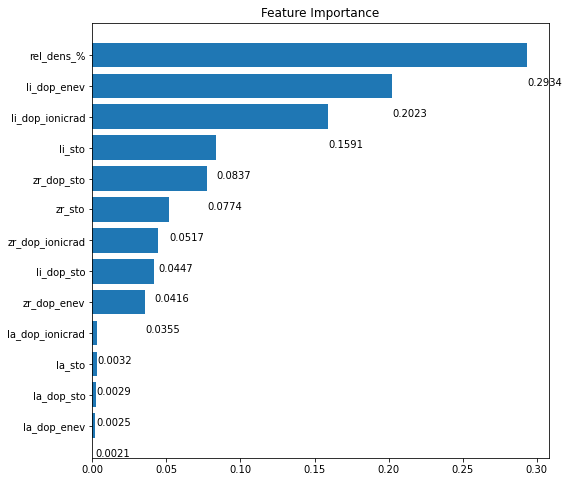

In [40]:
#Showing GradientBoostingRegressor's built-in feature importance
rf_fit = rf_opt.fit(X, y)
feat_importance = rf_fit.feature_importances_
sorted_idx = np.argsort(feat_importance)
pos = np.arange(sorted_idx.shape[0]) + 1
fig = plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.barh(pos, feat_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')
sorted_feat = feat_importance[sorted_idx]
sort_fe = []
for feat in sorted_feat:
    fe = round(feat, 4)
    sort_fe.append(fe)
for index, value in enumerate(sort_fe):
    plt.text(value, index, str(value))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

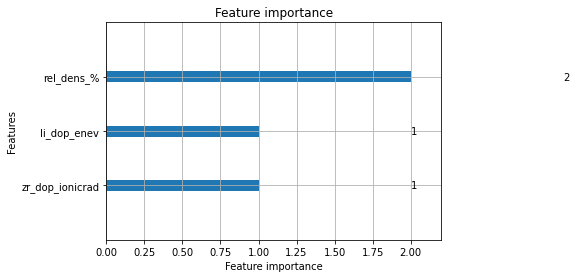

In [41]:
from lightgbm import plot_importance
lgbm_fit = lgbm_opt.fit(X, y)
plot_importance(lgbm_fit)


In [42]:
lgbm_df = study_lgbm.trials_dataframe()
rf_df = study_rf.trials_dataframe()
nu_df = study_nusvc.trials_dataframe()